In [1]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree

In [2]:
import numpy as np
from numpy import array
import graphviz
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11
df.head()

,x,y,Magicv2,localization4,localizationlab,Magicv2_5g,localization3,localization_lab5g,localization1,localization4_5g,localization2,localization3_5g,localization1_5g,Average
0,5.0,-11.75,-56,-45,-66,-66,-41,-79,-76,-73,-75,-61,-90,-66.181818
1,5.0,-11.75,-56,-45,-63,-65,-41,-78,-73,-68,-75,-63,-95,-65.636364
2,5.0,-11.75,-55,-48,-59,-67,-42,-78,-73,-67,-73,-59,-93,-64.909091
3,5.0,-11.75,-55,-48,-59,-70,-43,-78,-73,-68,-73,-56,-95,-65.272727
4,5.0,-11.75,-55,-46,-63,-70,-39,-80,-73,-70,-73,-57,-95,-65.545455


In [130]:
X = df.drop('Average', axis = 1)
y = df['Average']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [132]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [133]:
y_pred = regressor.predict(X_test)

In [134]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-74.363636
497,-74.181818,-74.363636
498,-74.090909,-73.727273
499,-74.181818,-73.727273
500,-75.000000,-74.636364
...,...,...
615,-70.363636,-74.363636
616,-70.181818,-74.363636
617,-70.454545,-74.363636
618,-70.363636,-74.363636


In [135]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.8856304985337229
Mean Squared Error: 4.8864302852572585
Root Mean Squared Error: 2.210527150988483


In [136]:
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_0 <= 13.62
|   |--- feature_5 <= -77.00
|   |   |--- feature_8 <= -91.00
|   |   |   |--- feature_10 <= -72.00
|   |   |   |   |--- feature_4 <= -70.50
|   |   |   |   |   |--- value: [-75.27]
|   |   |   |   |--- feature_4 >  -70.50
|   |   |   |   |   |--- feature_10 <= -82.50
|   |   |   |   |   |   |--- feature_12 <= -95.50
|   |   |   |   |   |   |   |--- value: [-72.64]
|   |   |   |   |   |   |--- feature_12 >  -95.50
|   |   |   |   |   |   |   |--- value: [-72.55]
|   |   |   |   |   |--- feature_10 >  -82.50
|   |   |   |   |   |   |--- feature_10 <= -78.50
|   |   |   |   |   |   |   |--- feature_12 <= -95.50
|   |   |   |   |   |   |   |   |--- feature_3 <= -50.50
|   |   |   |   |   |   |   |   |   |--- value: [-72.55]
|   |   |   |   |   |   |   |   |--- feature_3 >  -50.50
|   |   |   |   |   |   |   |   |   |--- value: [-72.45]
|   |   |   |   |   |   |   |--- feature_12 >  -95.50
|   |   |   |   |   |   |   |   |--- value: [-72.45]
|   |   |   |   |   |   

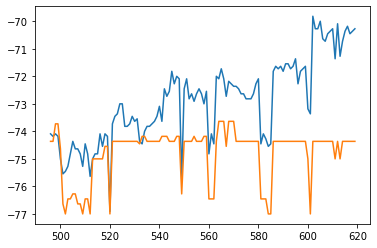

In [138]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.show()